In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [81]:
start_df = pd.read_csv('Data.csv')

# Best way to avoid ambiguities with european vs US date format
start_df["Dates"] = pd.to_datetime(start_df["Dates"], format="%m/%d/%Y")
start_df = start_df.sort_values("Dates")
start_df.head()

,Dates,Brazil_Equity,Germany_Equity,Nasdaq,Japan_Equity,Australia_Equity,Spain_Equity,US_2y,US_10y,Germany_2y,...,Wheat,Corn,Rice,Copper,EURUSD,USDJPY,CHFJPY,CADBRL,GBPMXN,SGDBRL
0,2010-05-06,63907,5932.5,1886.00,10680,4573,9272.5,109.195312,119.921875,109.680,...,497.25,364.00,11.650,310.35,1.2733,92.25,83.269,1.7596,19.2042,1.3131
1,2010-05-07,63191,5722.0,1848.50,10430,4474,8928.0,109.101562,119.687500,109.635,...,500.25,364.75,11.535,313.10,1.2755,91.59,82.669,1.7547,19.0523,1.3130
2,2010-05-10,66047,6000.5,1939.50,10540,4610,10248.0,109.039062,118.937500,109.525,...,482.50,363.00,11.690,321.50,1.2810,93.26,84.095,1.7361,18.6127,1.2902
3,2010-05-11,64886,6042.5,1935.25,10400,4557,10005.5,109.039062,119.015625,109.575,...,483.75,369.75,11.690,319.40,1.2743,93.07,84.132,1.7460,18.6594,1.2866
4,2010-05-12,65668,6196.0,1972.75,10370,4583,10078.5,109.015625,118.796875,109.610,...,482.75,371.75,11.785,317.60,1.2656,93.16,83.971,1.7372,18.4502,1.2829


In [82]:
# First general check
start_df.describe()

# Count yields 3900 days so there are no Sundays and Saturdays inside.

,Dates,Brazil_Equity,Germany_Equity,Nasdaq,Japan_Equity,Australia_Equity,Spain_Equity,US_2y,US_10y,Germany_2y,...,Wheat,Corn,Rice,Copper,EURUSD,USDJPY,CHFJPY,CADBRL,GBPMXN,SGDBRL
count,3912,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,...,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000
mean,2017-11-03 02:23:33.496932608,82862.594070,11773.996472,8030.895118,20967.484663,5947.802147,9365.683282,107.809348,124.837579,110.236998,...,604.745974,487.023326,13.620003,334.643648,1.183248,111.486439,118.801806,2.908073,23.619065,2.728624
min,2010-05-06 00:00:00,37694.000000,5080.000000,1721.250000,8160.000000,3879.000000,5948.300000,101.015625,105.421875,104.535000,...,361.000000,301.500000,9.125000,194.350000,0.958200,75.810000,77.436000,1.605600,18.132700,1.250600
25%,2014-02-03 18:00:00,57311.000000,9190.750000,3551.187500,14777.500000,5127.000000,8505.325000,106.015625,120.105469,109.330000,...,502.000000,369.250000,11.663750,275.175000,1.094600,101.665000,107.345500,2.119550,21.467600,1.803900
50%,2017-11-02 12:00:00,73309.000000,11838.750000,6230.000000,20350.000000,5778.000000,9299.700000,109.328125,126.023438,110.935000,...,577.250000,431.750000,13.525000,327.375000,1.141350,109.650000,114.075000,2.789350,23.801800,2.667000
75%,2021-08-03 06:00:00,110257.500000,13918.250000,12404.375000,27190.000000,6925.000000,10269.375000,110.109375,130.734375,112.020000,...,688.812500,616.562500,15.480000,389.050000,1.280325,120.140000,124.998250,3.778825,25.698475,3.711125
max,2025-05-02 00:00:00,139123.000000,23474.000000,22250.500000,42370.000000,8522.000000,13480.800000,110.507812,140.328125,112.815000,...,1425.250000,831.250000,22.065000,521.600000,1.487400,161.690000,179.814000,4.595600,30.900000,4.583100
std,NaN,28328.357506,3752.809578,5515.871771,8493.734789,1120.125577,1287.712095,2.866557,7.985446,2.271447,...,142.516819,139.489838,2.428138,71.693699,0.112075,20.783977,24.630245,0.877119,2.772785,0.983323


In [83]:
# Control for integrity
start_df.isna().sum()

Dates               0
Brazil_Equity       0
Germany_Equity      0
Nasdaq              0
Japan_Equity        0
Australia_Equity    0
Spain_Equity        0
US_2y               0
US_10y              0
Germany_2y          0
Germany_10y         0
Japan_10y           0
UK_10y              0
Gold                0
Oil                 0
Wheat               0
Corn                0
Rice                0
Copper              0
EURUSD              0
USDJPY              0
CHFJPY              0
CADBRL              0
GBPMXN              0
SGDBRL              0
dtype: int64

In [84]:
# Check dtypes:
print(start_df.dtypes)
# Check for zeros or negatives:
print((start_df.drop(columns=['Dates']) <= 0).sum())

Dates               datetime64[ns]
Brazil_Equity                int64
Germany_Equity             float64
Nasdaq                     float64
Japan_Equity                 int64
Australia_Equity             int64
Spain_Equity               float64
US_2y                      float64
US_10y                     float64
Germany_2y                 float64
Germany_10y                float64
Japan_10y                  float64
UK_10y                     float64
Gold                       float64
Oil                        float64
Wheat                      float64
Corn                       float64
Rice                       float64
Copper                     float64
EURUSD                     float64
USDJPY                     float64
CHFJPY                     float64
CADBRL                     float64
GBPMXN                     float64
SGDBRL                     float64
dtype: object
Brazil_Equity       0
Germany_Equity      0
Nasdaq              0
Japan_Equity        0
Australia_Equity    0
S

In [85]:
# Some columns are int64. I do not like that. Casting them to float64.
# Identify all non-“Dates” columns
cols = [c for c in start_df.columns if c != 'Dates']
# Cast those columns to float, in-place
start_df[cols] = start_df[cols].astype(float)

# And re-run checks:
# Check dtypes:
print(start_df.dtypes)
# Check for zeros or negatives:
print((start_df.drop(columns=['Dates']) <= 0).sum())

Dates               datetime64[ns]
Brazil_Equity              float64
Germany_Equity             float64
Nasdaq                     float64
Japan_Equity               float64
Australia_Equity           float64
Spain_Equity               float64
US_2y                      float64
US_10y                     float64
Germany_2y                 float64
Germany_10y                float64
Japan_10y                  float64
UK_10y                     float64
Gold                       float64
Oil                        float64
Wheat                      float64
Corn                       float64
Rice                       float64
Copper                     float64
EURUSD                     float64
USDJPY                     float64
CHFJPY                     float64
CADBRL                     float64
GBPMXN                     float64
SGDBRL                     float64
dtype: object
Brazil_Equity       0
Germany_Equity      0
Nasdaq              0
Japan_Equity        0
Australia_Equity    0
S

In [86]:
# First exploration plots.
equity_cols = [col for col in start_df.columns if 'Equity' in col] + ['Nasdaq']
two_years = [col for col in start_df.columns if '_2y' in col]
ten_years = [col for col in start_df.columns if '_10y' in col]
commodities_agri = ['Wheat','Corn','Rice']
commodities_Metals = ['Gold','Copper']
oil = ['Oil']
nasdaq = ['Nasdaq']
currencies = ['EURUSD', 'USDJPY', 'CHFJPY', 'CADBRL', 'GBPMXN', 'SGDBRL']

bundle_of_futures = [equity_cols,ten_years,two_years,ten_years,commodities_agri,commodities_Metals,oil,nasdaq,currencies]

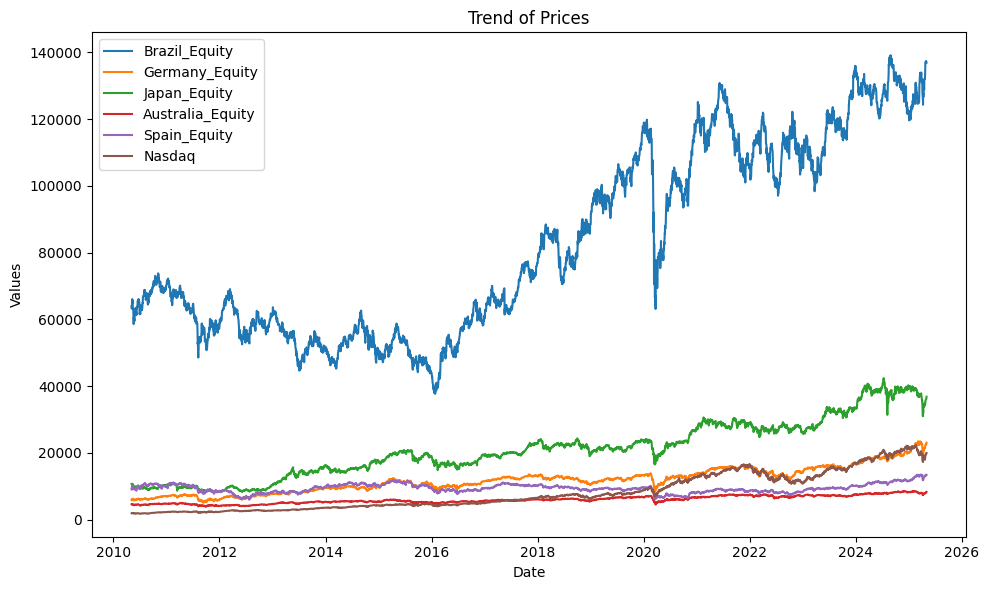

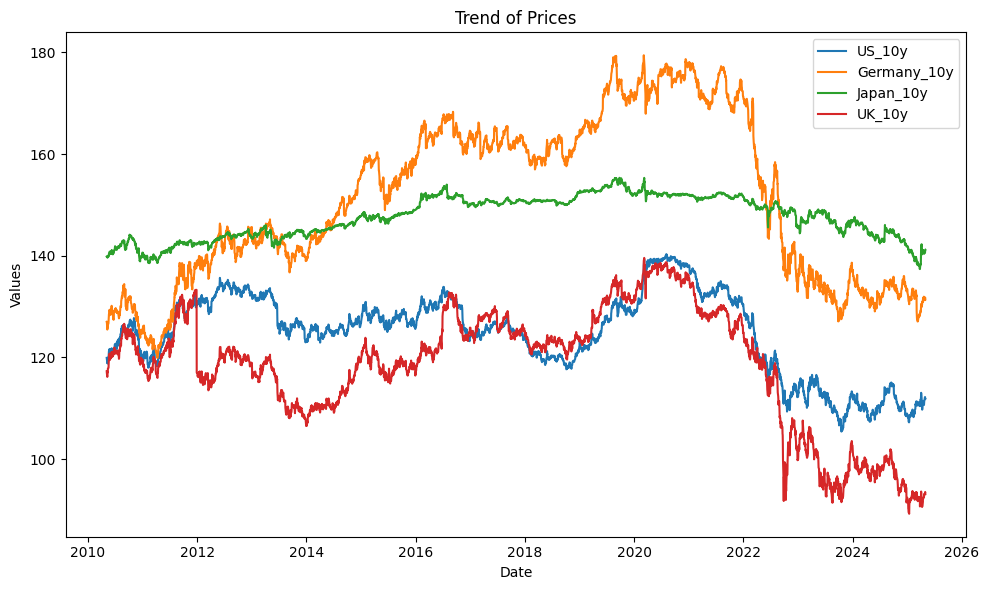

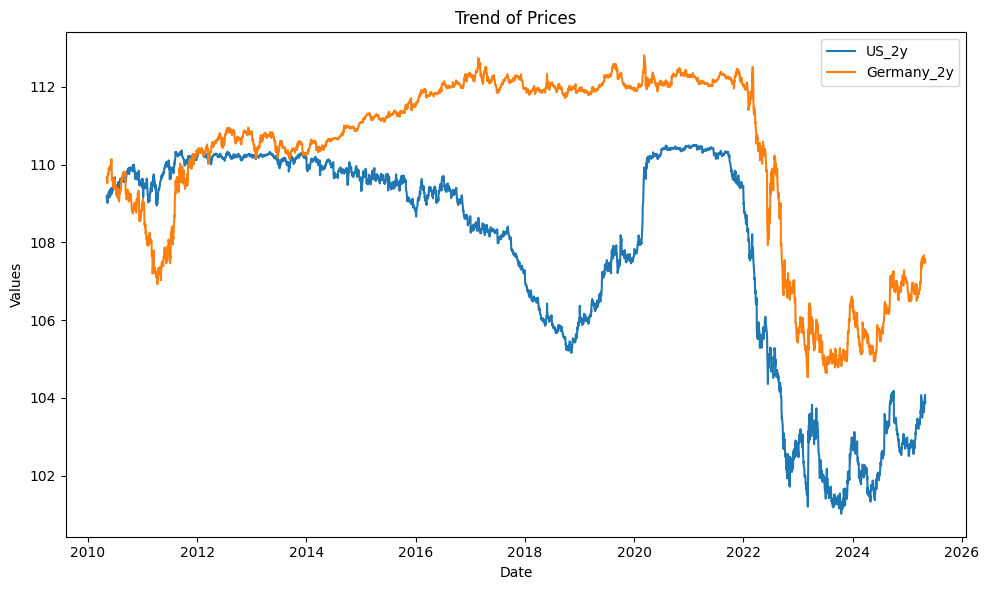

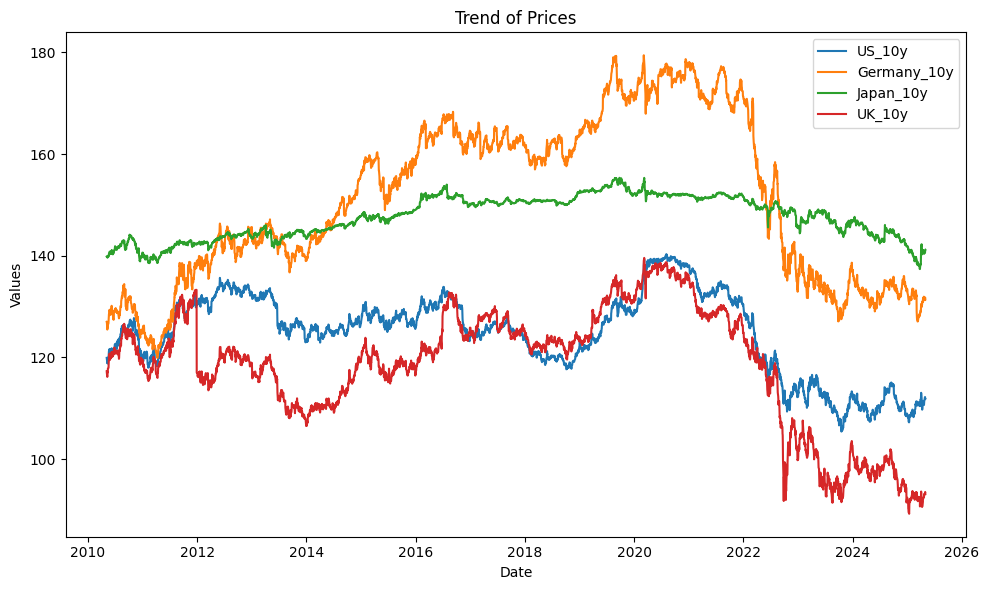

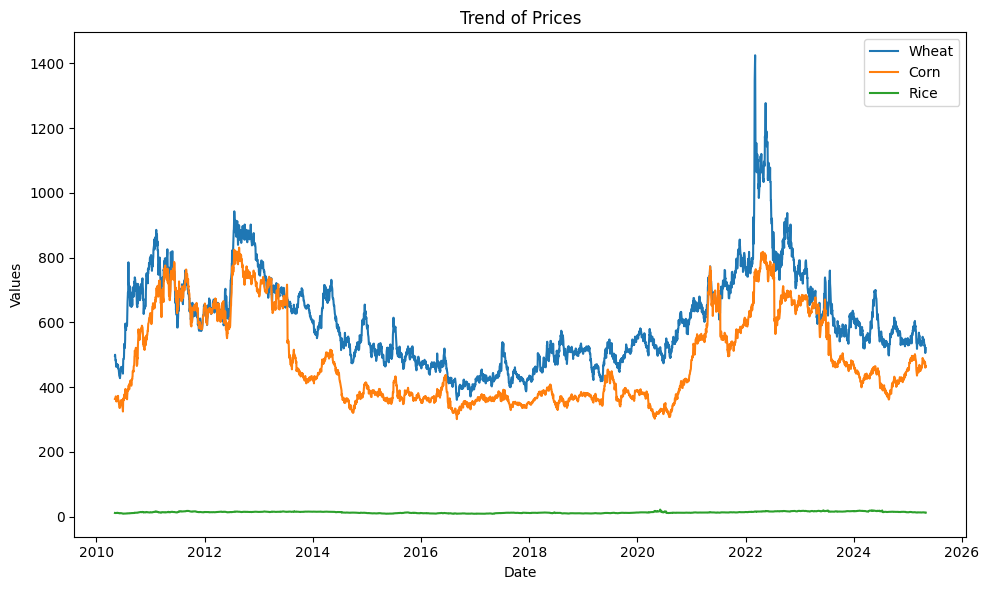

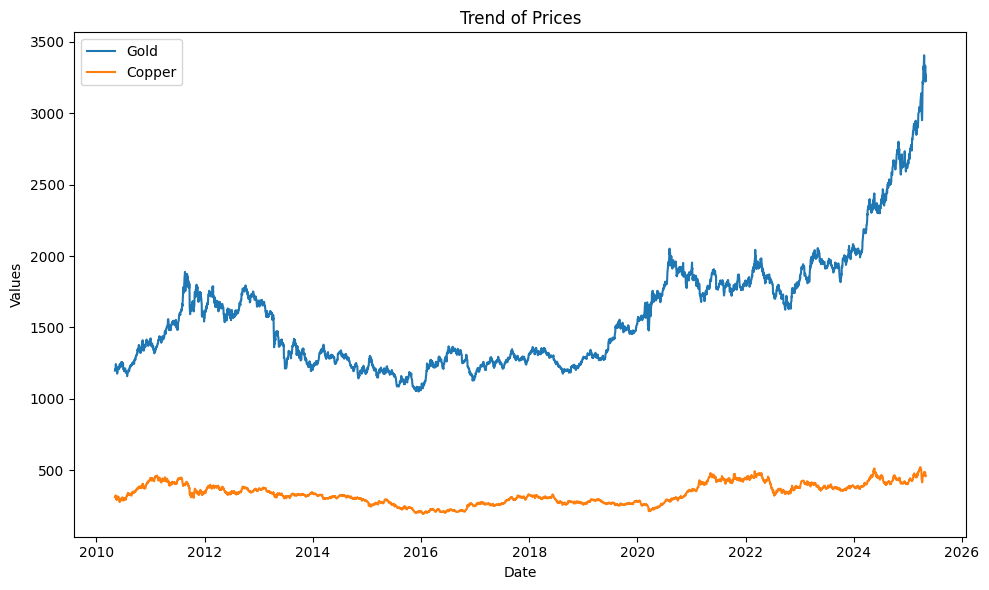

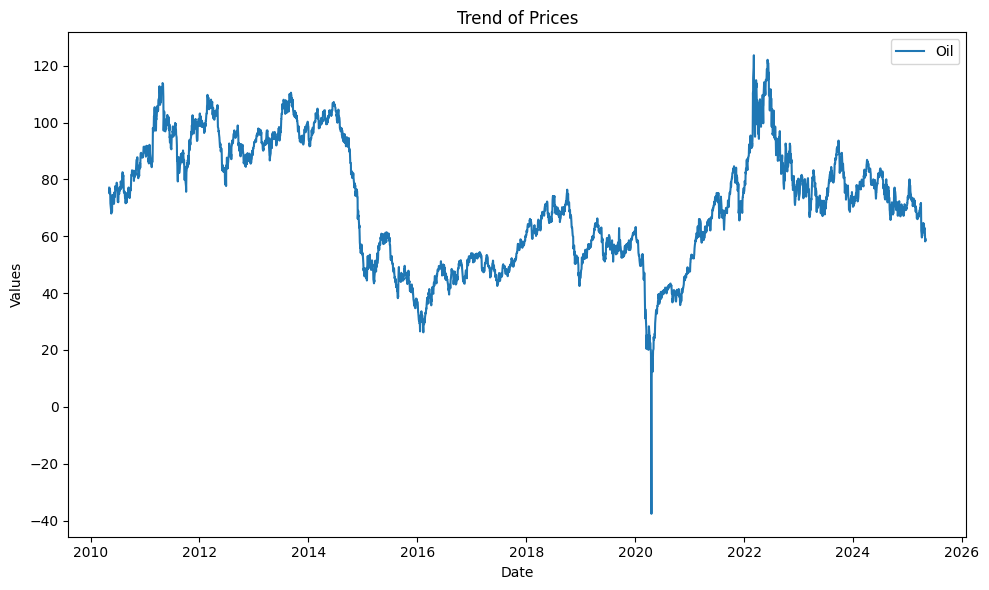

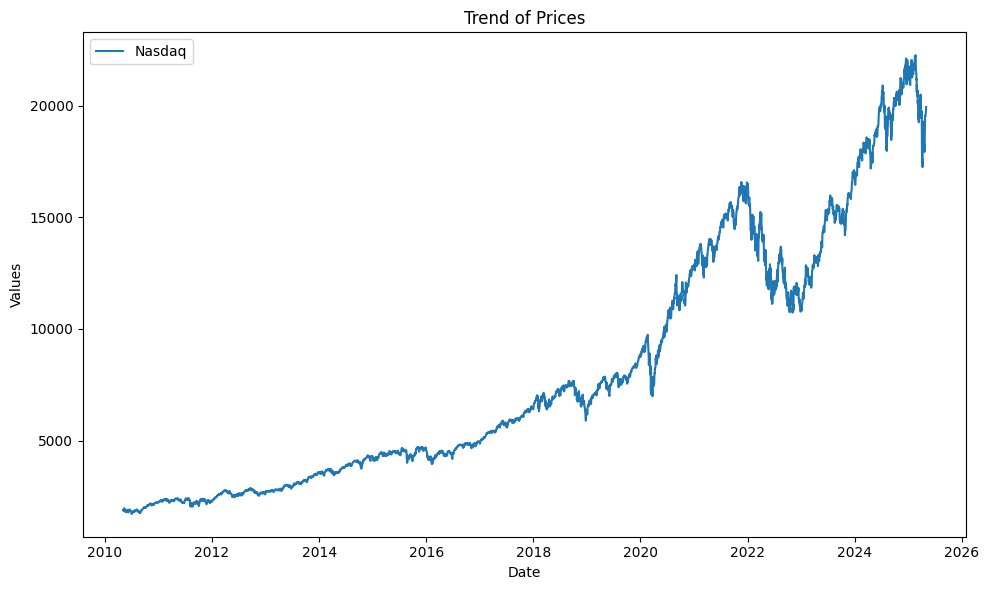

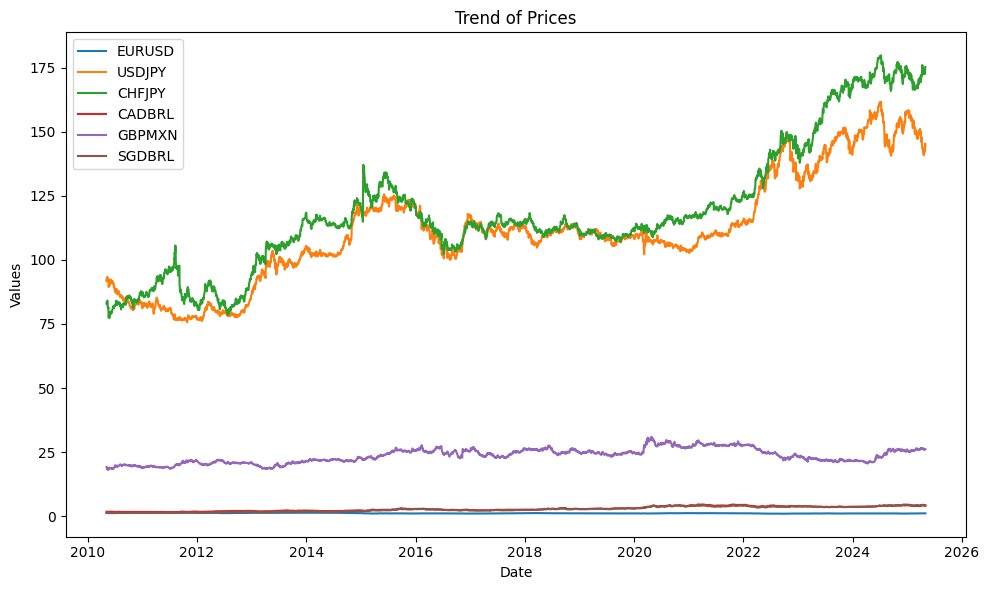

In [87]:
for elem in bundle_of_futures:
    plt.figure(figsize=(10, 6))
    for col in elem:
        plt.plot(start_df['Dates'], start_df[col], label=col)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title('Trend of Prices')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()

In [88]:
# There a case when prices are negative. Uhm.
start_df[['Dates','Oil']].loc[start_df['Oil']<=0]

,Dates,Oil
2597,2020-04-20,-37.63


In [89]:
# It is not a DQ issue. Essentially, during pandemic people would PAY to get rid of futures. As such, it should not be discarded.

In [90]:
# Ok, let's roll!
# Set index:
start_df.set_index("Dates", inplace=True)

In [91]:
start_df.head()

,Brazil_Equity,Germany_Equity,Nasdaq,Japan_Equity,Australia_Equity,Spain_Equity,US_2y,US_10y,Germany_2y,Germany_10y,...,Wheat,Corn,Rice,Copper,EURUSD,USDJPY,CHFJPY,CADBRL,GBPMXN,SGDBRL
Dates,,,,,,,,,,,,,,,,,,,,,
2010-05-06,63907.0,5932.5,1886.00,10680.0,4573.0,9272.5,109.195312,119.921875,109.680,127.01,...,497.25,364.00,11.650,310.35,1.2733,92.25,83.269,1.7596,19.2042,1.3131
2010-05-07,63191.0,5722.0,1848.50,10430.0,4474.0,8928.0,109.101562,119.687500,109.635,126.97,...,500.25,364.75,11.535,313.10,1.2755,91.59,82.669,1.7547,19.0523,1.3130
2010-05-10,66047.0,6000.5,1939.50,10540.0,4610.0,10248.0,109.039062,118.937500,109.525,125.49,...,482.50,363.00,11.690,321.50,1.2810,93.26,84.095,1.7361,18.6127,1.2902
2010-05-11,64886.0,6042.5,1935.25,10400.0,4557.0,10005.5,109.039062,119.015625,109.575,125.63,...,483.75,369.75,11.690,319.40,1.2743,93.07,84.132,1.7460,18.6594,1.2866
2010-05-12,65668.0,6196.0,1972.75,10370.0,4583.0,10078.5,109.015625,118.796875,109.610,125.67,...,482.75,371.75,11.785,317.60,1.2656,93.16,83.971,1.7372,18.4502,1.2829


In [92]:
def compute_ln_ret(prev: float, curr: float) -> float:
    # The minimum will ensure to keep the minus sign if it shows up in the time series.
    # Not sure if it makes sense, tho.
    return np.minimum(np.sign(curr),np.sign(prev)) * np.log(np.abs(curr)/np.abs(prev))

def compute_ln_ret_to_Series(series: pd.Series, period: int = 1) -> pd.Series:
    prev = series.shift(period)
    # build a new Series of the same length
    transformed = [
        compute_ln_ret(p, x) if not pd.isna(p) else x
        for p, x in zip(prev, series)
    ]
    return pd.Series(transformed, index=series.index)

In [97]:
df_log_returns = start_df.apply(compute_ln_ret_to_Series, axis=0)
df_log_returns_32 = start_df.apply(lambda s: compute_ln_ret_to_Series(s, period=32), axis=0)

In [98]:
# Drop the first line
df_log_returns = df_log_returns.iloc[1:]
df_log_returns_32 = df_log_returns_32.iloc[32:]

In [99]:
df_log_returns.describe()

,Brazil_Equity,Germany_Equity,Nasdaq,Japan_Equity,Australia_Equity,Spain_Equity,US_2y,US_10y,Germany_2y,Germany_10y,...,Wheat,Corn,Rice,Copper,EURUSD,USDJPY,CHFJPY,CADBRL,GBPMXN,SGDBRL
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,...,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,0.000195,0.000347,0.000603,0.000316,0.000151,0.000093,-0.000013,-0.000018,-0.000005,0.000009,...,0.000012,0.000062,0.000024,0.000101,-0.000030,0.000115,0.000190,0.000216,0.000079,0.000308
std,0.015072,0.012230,0.013006,0.013433,0.009916,0.013440,0.000831,0.003405,0.000778,0.004130,...,0.019660,0.017284,0.016026,0.014036,0.005123,0.005744,0.006246,0.008381,0.007654,0.008587
min,-0.162461,-0.117531,-0.114764,-0.135123,-0.102702,-0.140785,-0.008355,-0.021768,-0.010022,-0.029574,...,-0.112971,-0.268620,-0.299703,-0.092477,-0.022878,-0.041810,-0.082072,-0.056151,-0.047065,-0.073921
25%,-0.007629,-0.005012,-0.004628,-0.005787,-0.004503,-0.006434,-0.000286,-0.001934,-0.000225,-0.001977,...,-0.011397,-0.008636,-0.007424,-0.007195,-0.002924,-0.002624,-0.002844,-0.004639,-0.004386,-0.004189
50%,0.000000,0.000519,0.000761,0.000000,0.000461,0.000288,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000162,0.000242,0.000107,-0.000143,0.000301
75%,0.008327,0.006387,0.007024,0.007353,0.005421,0.006841,0.000285,0.001915,0.000225,0.002176,...,0.010814,0.008914,0.007535,0.007887,0.002830,0.003163,0.003223,0.005017,0.004303,0.004830
max,0.136565,0.100645,0.112072,0.087224,0.072494,0.137890,0.010163,0.019727,0.009269,0.026955,...,0.197014,0.086178,0.107921,0.072992,0.029508,0.034917,0.130637,0.083504,0.072835,0.081087


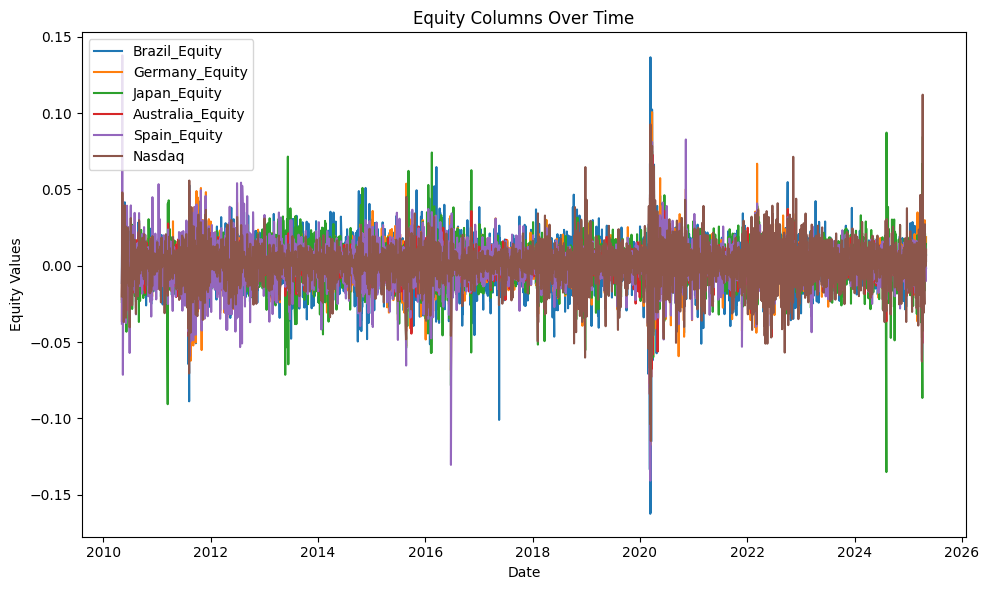

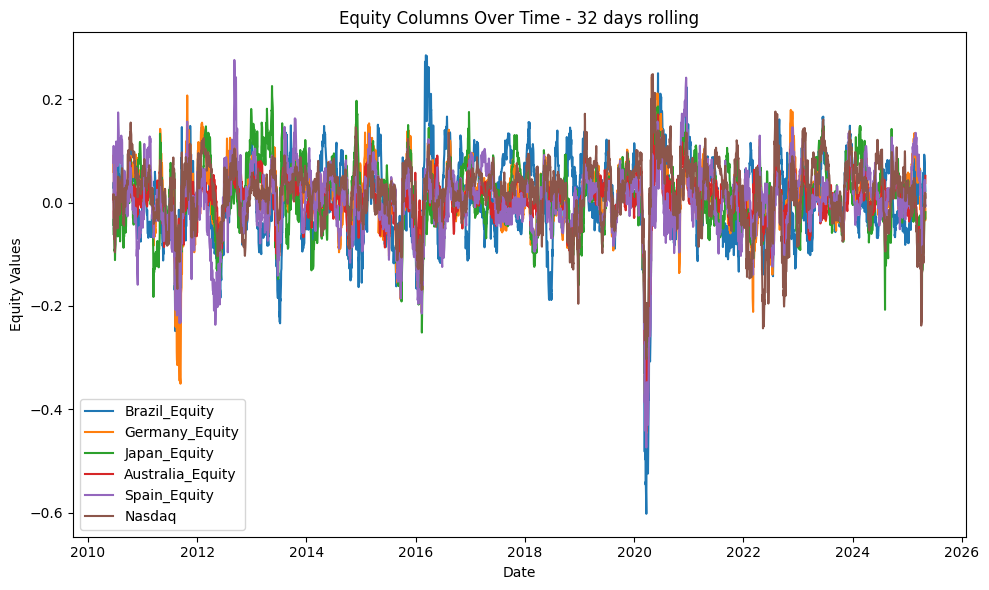

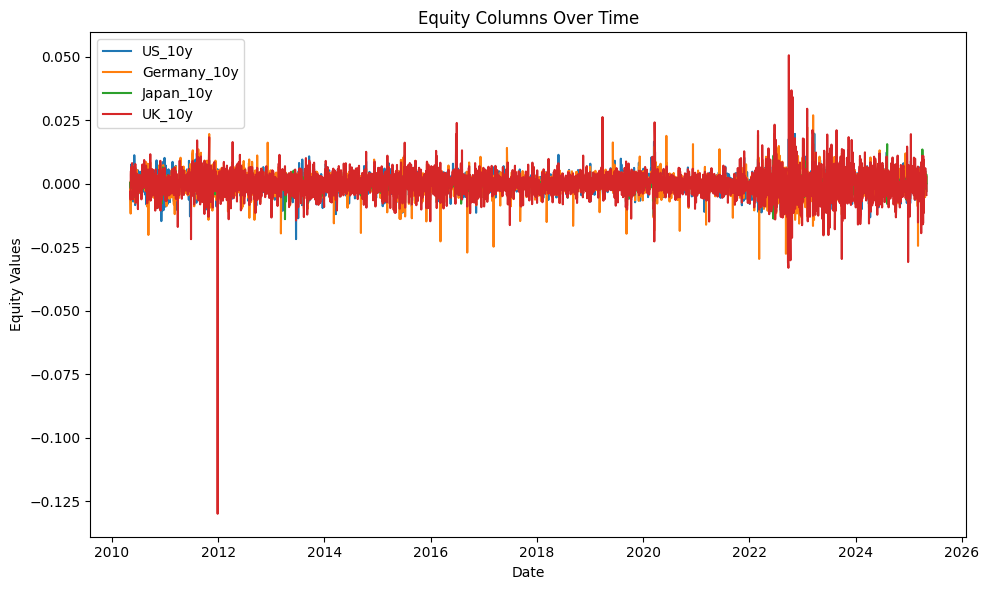

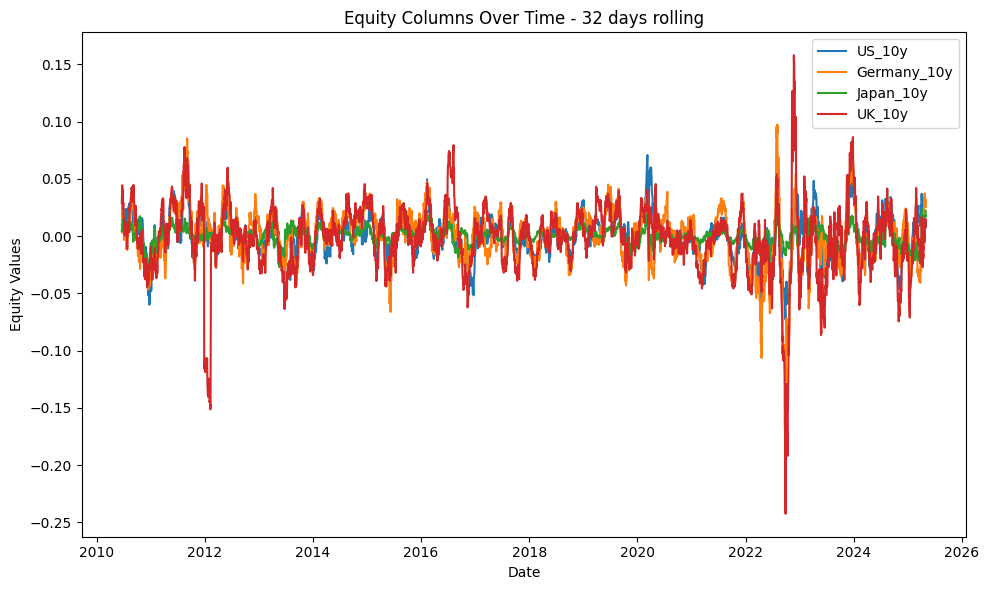

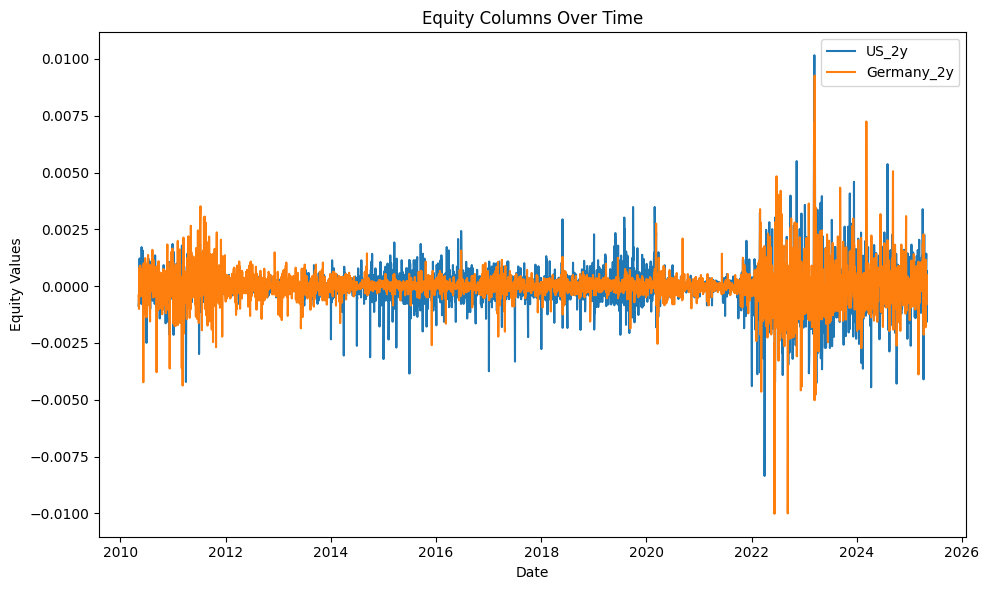

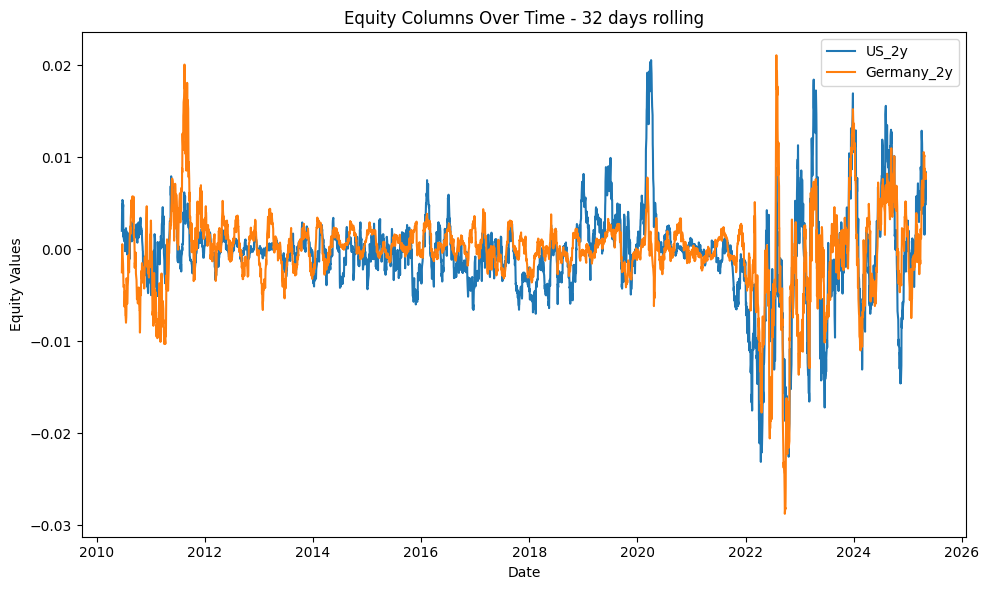

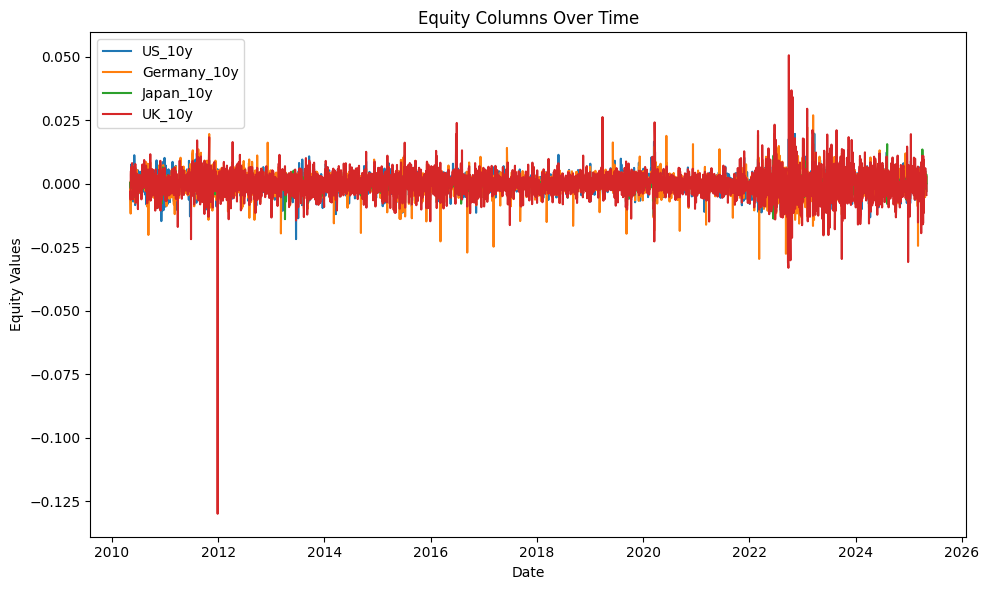

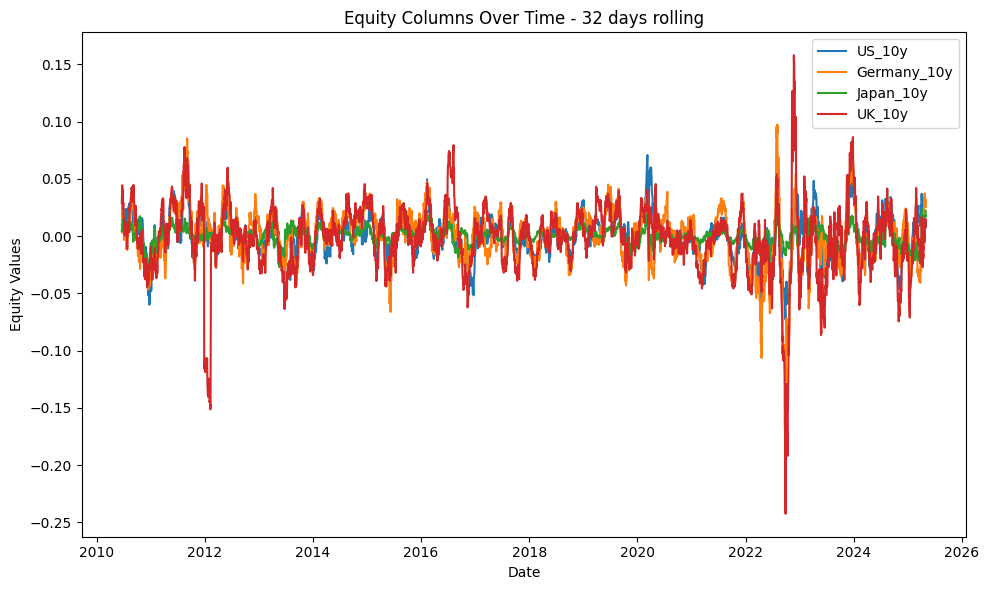

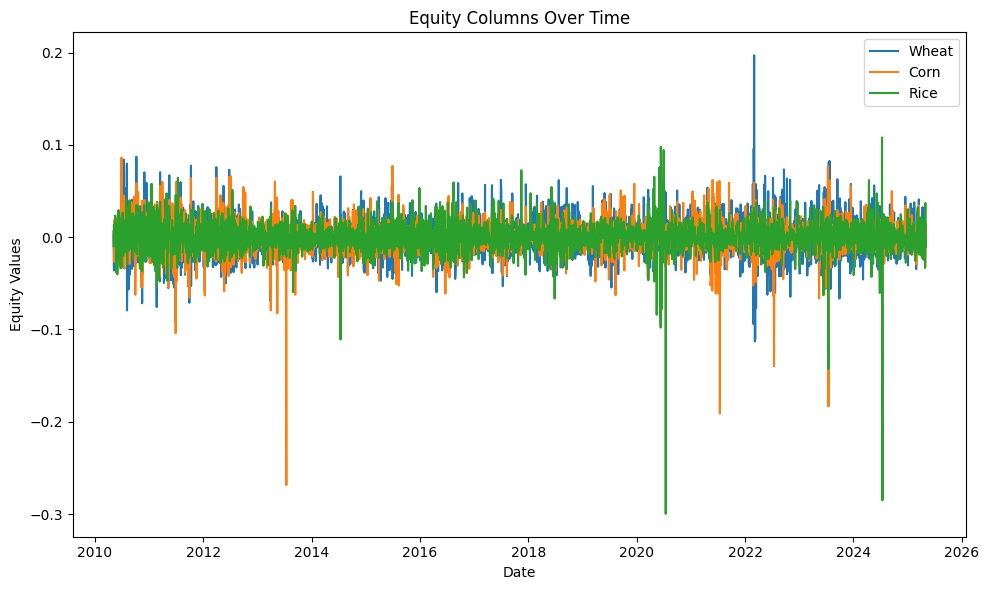

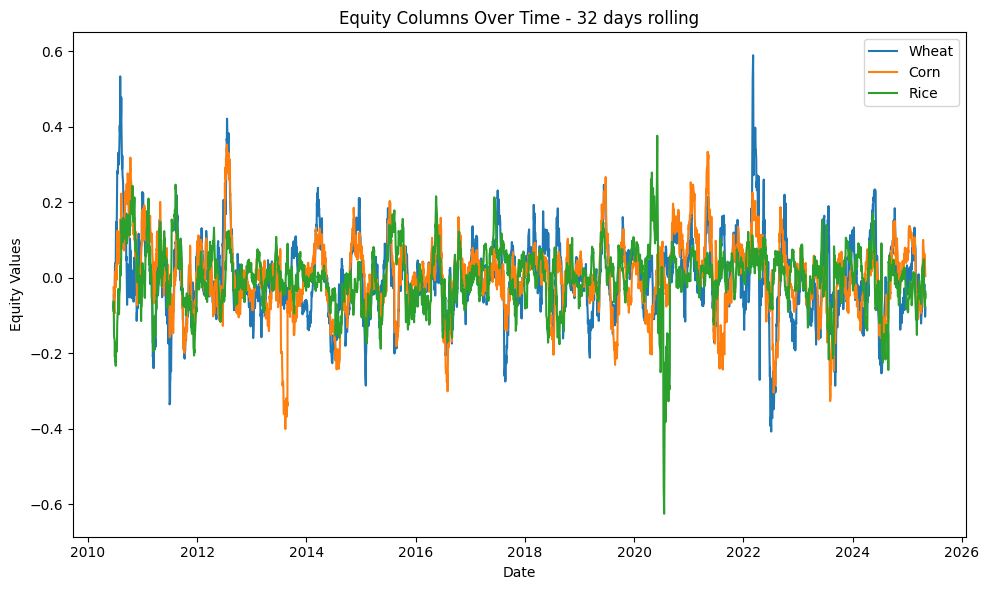

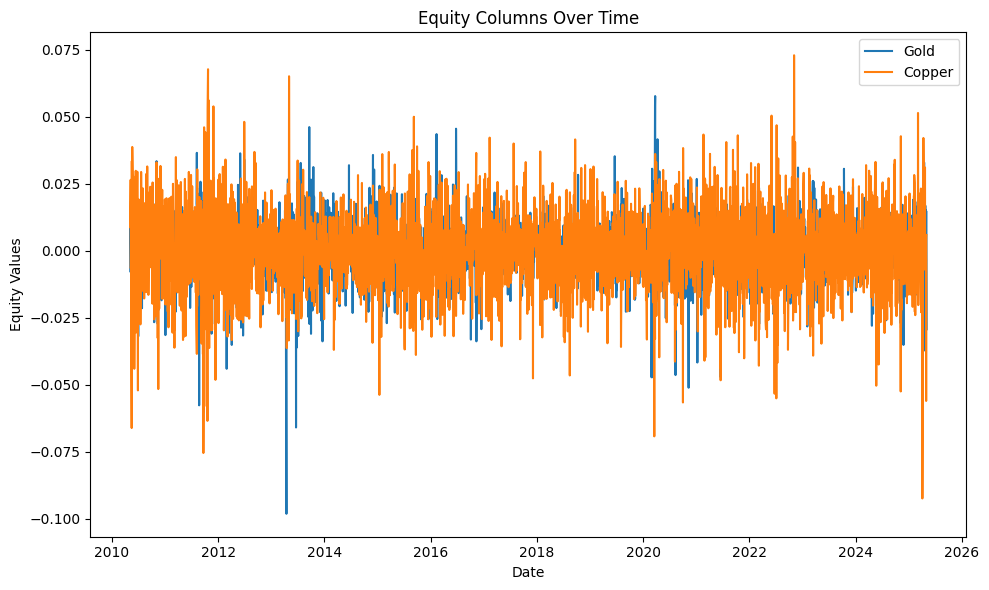

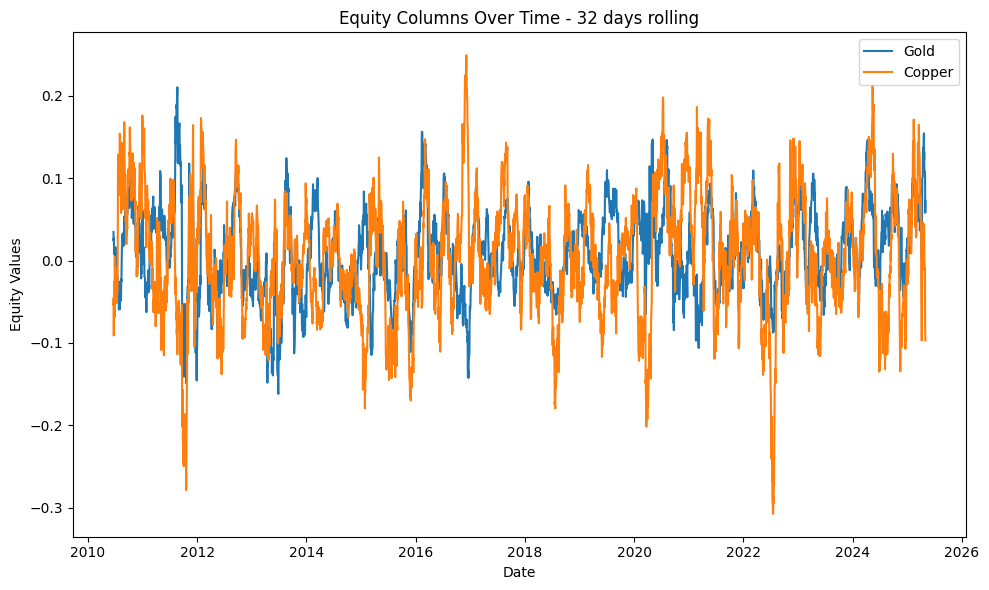

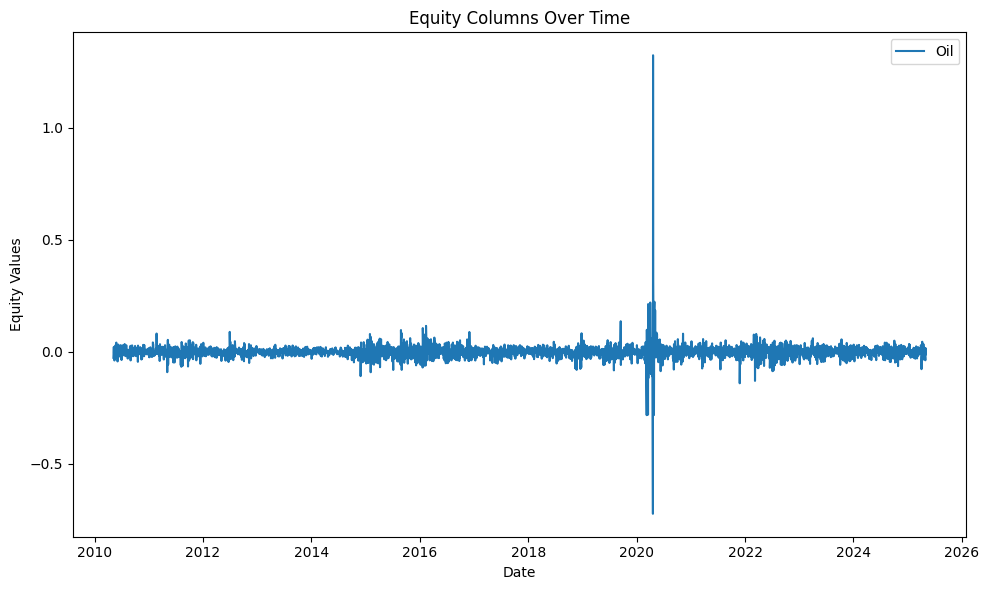

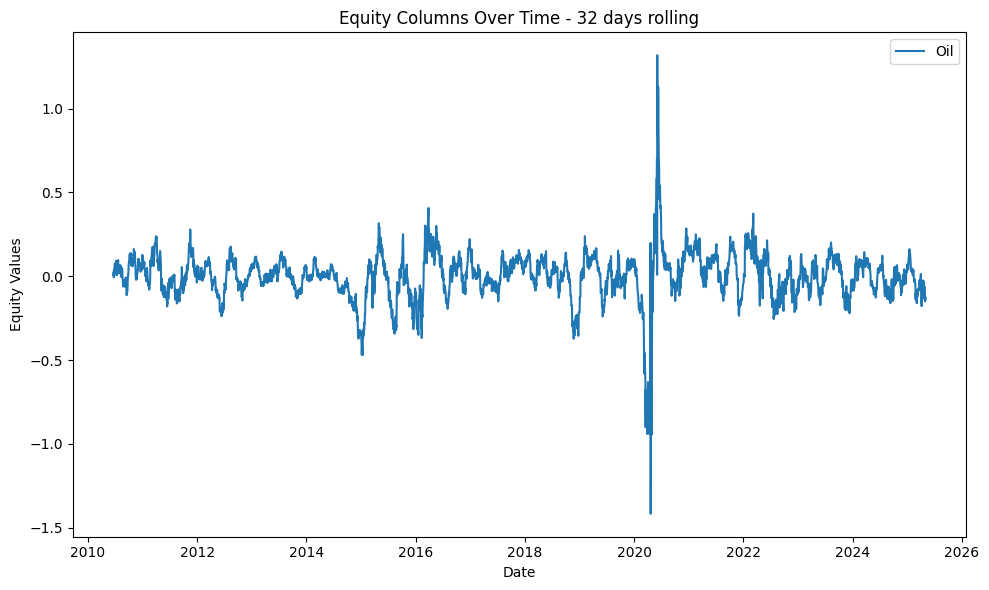

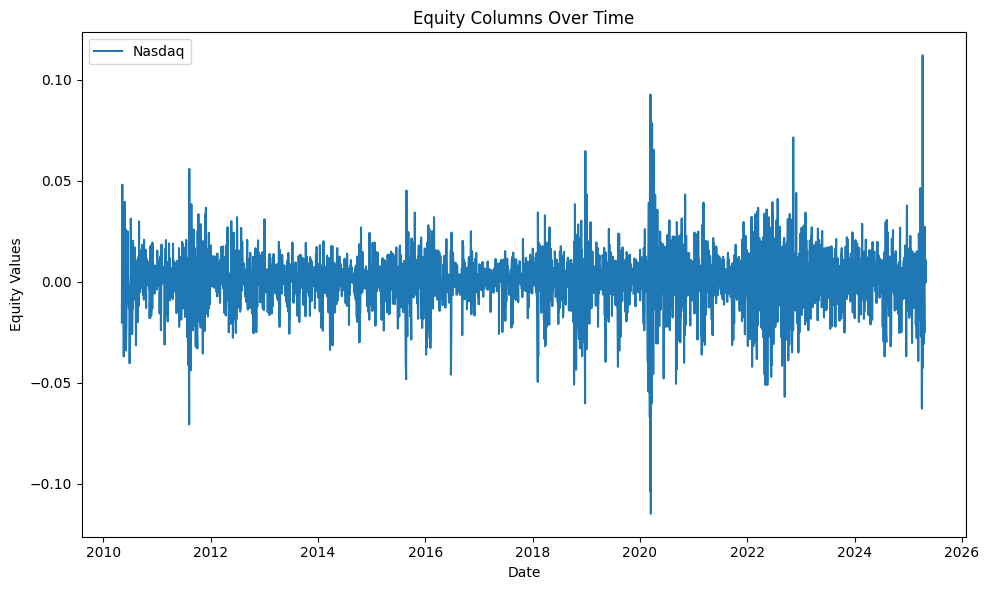

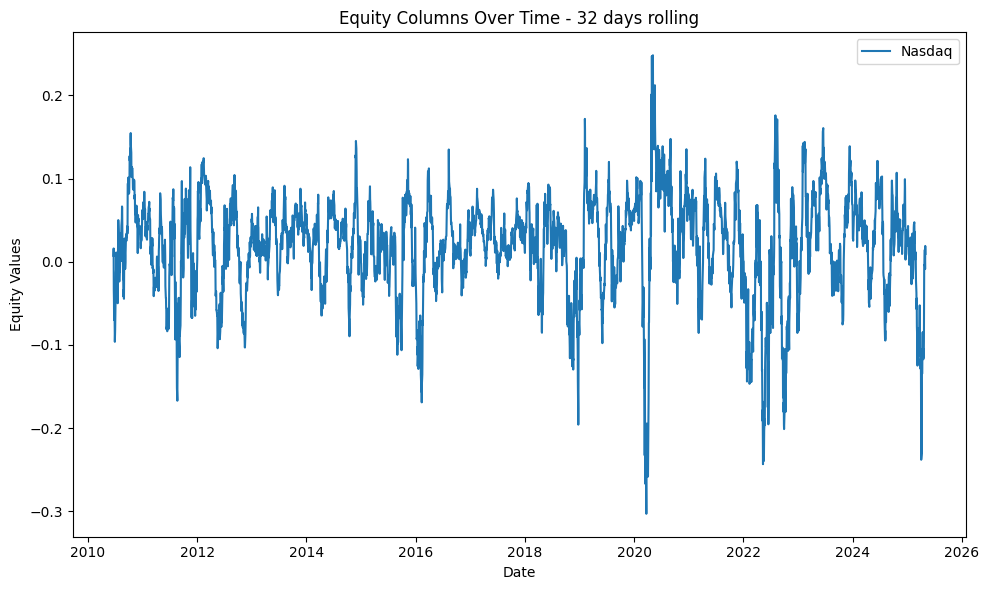

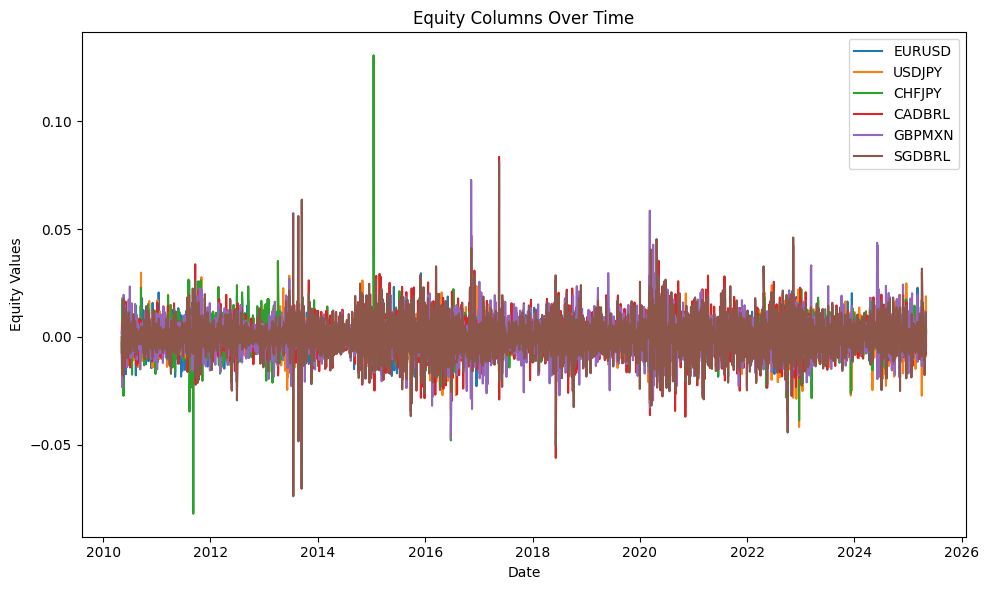

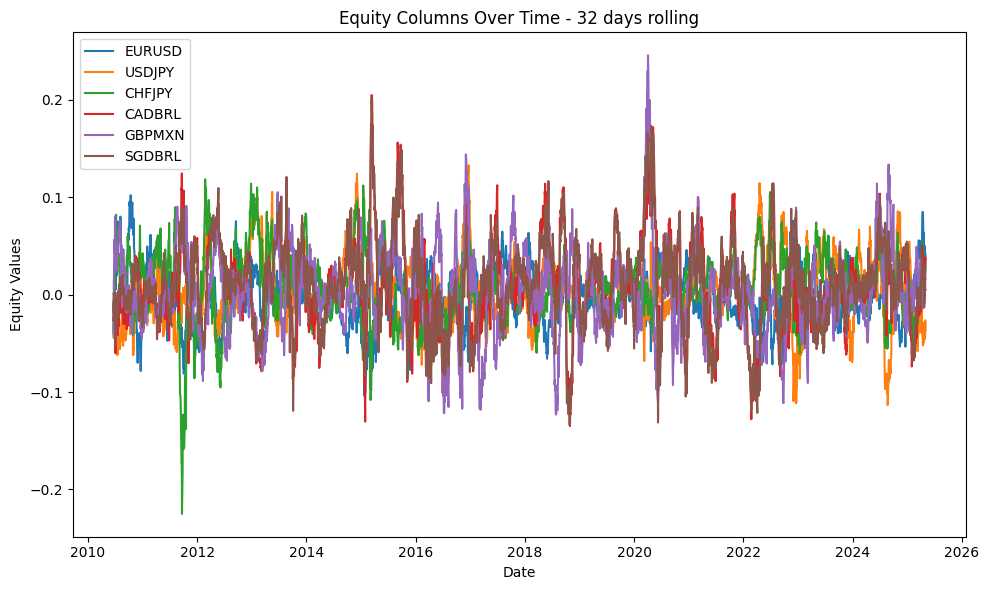

In [100]:
for item in bundle_of_futures:
    plt.figure(figsize=(10, 6))
    for col in item:
        plt.plot(df_log_returns[col], label=col)

    plt.xlabel('Date')
    plt.ylabel('Equity Values')
    plt.title('Equity Columns Over Time')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()
    plt.close()

    plt.figure(figsize=(10, 6))
    for col in item:
        plt.plot(df_log_returns_32[col], label=col)

    plt.xlabel('Date')
    plt.ylabel('Equity Values')
    plt.title('Equity Columns Over Time - 32 days rolling')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()
    plt.close()


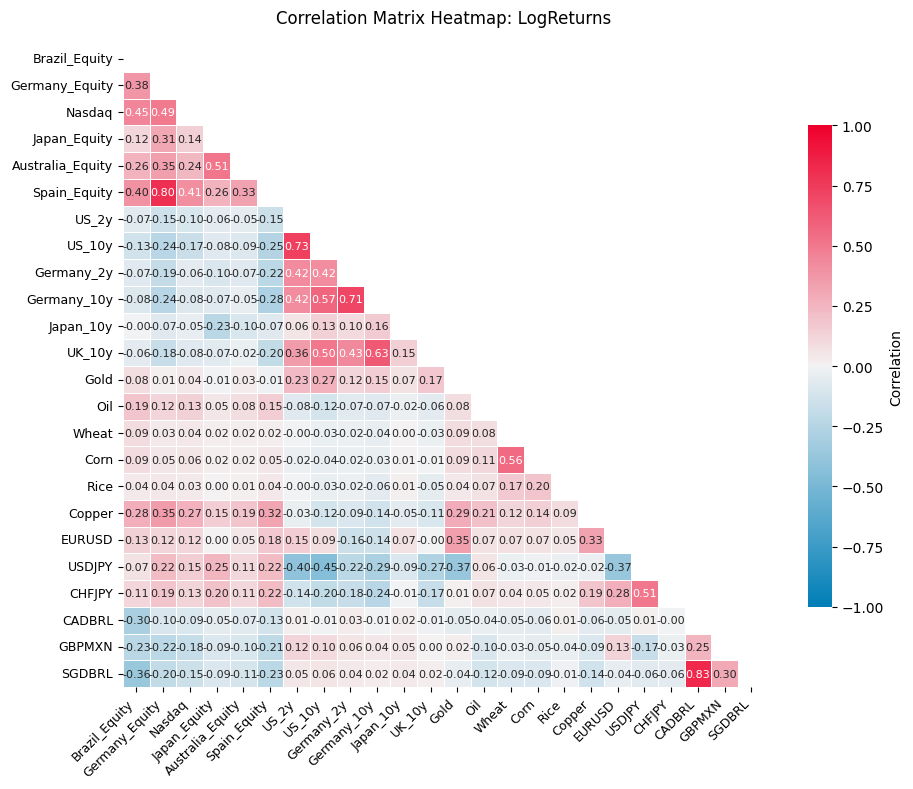

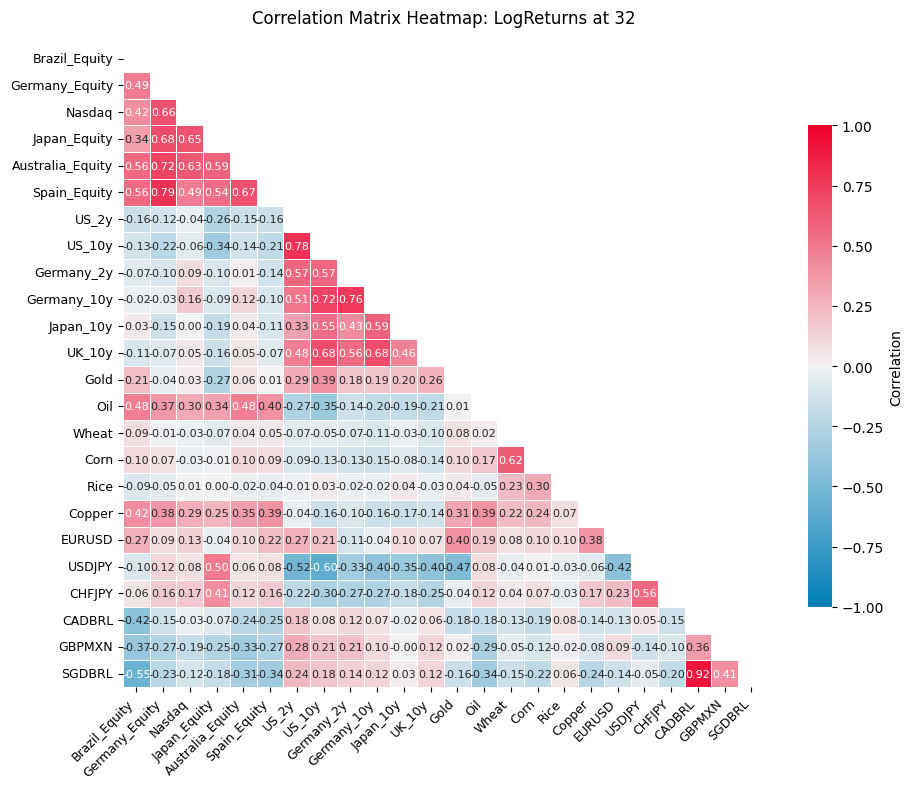

In [102]:
# Compute correlation matrix
corr = df_log_returns.corr()


# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
palette = sns.diverging_palette(240, 10, n=9, s=100, l=50, as_cmap=True)

# Set up the figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=palette,        # diverging palette
    vmin=-1, vmax=1,        # ensure full correlation range
    center=0,
    annot=True,             # show numbers
    fmt=".2f",              # 2 decimal places
    annot_kws={"size": 8},  # control number size
    square=True,            # make cells square
    linewidths=0.5,         # white lines between cells
    cbar_kws={"shrink": 0.75, "label": "Correlation"}
)

# Tweak the tick labels
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title("Correlation Matrix Heatmap: LogReturns", pad=16)
plt.tight_layout()
plt.show()
plt.close()

# Compute the correlation matrix
corr = df_log_returns_32.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=palette,        # diverging palette
    vmin=-1, vmax=1,        # ensure full correlation range
    center=0,
    annot=True,             # show numbers
    fmt=".2f",              # 2 decimal places
    annot_kws={"size": 8},  # control number size
    square=True,            # make cells square
    linewidths=0.5,         # white lines between cells
    cbar_kws={"shrink": 0.75, "label": "Correlation"}
)

# Tweak the tick labels
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title("Correlation Matrix Heatmap: LogReturns at 32", pad=16)
plt.tight_layout()
plt.show()